In [21]:
#imports
import keras
from keras.models import load_model
from data import DataSet
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [27]:
#import inceptionv3
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [2]:
#declare and load the base model
model_name = 'lstm'

In [7]:
base_model = InceptionV3(weights='imagenet',include_top=True)

96116736/96112376 [==============================] - 180s 2us/step


In [12]:
#load image and transform
img = image.load_img('fb_pic.jpg', target_size=(224, 224))

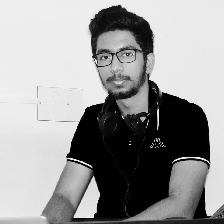

In [13]:
img

In [16]:
#some preprocessing
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [19]:
#predict and print the output
preds = base_model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n06359193', 'web_site', 0.999647), ('n04325704', 'stole', 0.00031933896), ('n04328186', 'stopwatch', 1.7238935e-05)]


In [32]:
mobile = keras.applications.mobilenet.MobileNet(weights='imagenet',include_top=True)

In [33]:
preds = mobile.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02883205', 'bow_tie', 0.8665422), ('n04229816', 'ski_mask', 0.0699626), ('n03724870', 'mask', 0.012528061)]


In [39]:
decode_predictions(mobile.predict(x), top=1)[0][0][1]

'bow_tie'

In [1]:
#imports
import keras
from keras.models import load_model
from data import DataSet
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

import cv2
mobile = keras.applications.mobilenet.MobileNet(weights='imagenet',include_top=True)


Using TensorFlow backend.


In [ ]:
## PUT THIS ALL IN ONE CELL!

# Connects to your computer's default camera
cap = cv2.VideoCapture('http://192.168.2.3:8160')


# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #some preprocessing
    #img = cv2.resize(frame, (224, 224)) 
    #x = image.img_to_array(frame)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    #preds = mobile.predict(x)
    #text = decode_predictions(mobile.predict(x), top=1)[0][0][1]
    # Display the resulting frame
    cv2.imshow('frame',frame)
    cv2.putText(img = frame, text = 'text', org = (int(width/2 - 20),int(height/2)), fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 3, 
                color = (0, 255, 0))
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()